# Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import RESSPyLab

# 1 - Load an experiment

Make a list of pandas dataframes with (clean) experimental data from a csv file. This is done with the pandas package from data in csv files. Two columns should be included in the csv file with true strain ("e_true") and true stress ("Sigma_true"). 

In [2]:

testFileNames=['example_1.csv']


listCleanTests=[]

for testFileName in testFileNames:
    
    test=pd.read_csv(testFileName)
    
    listCleanTests.append(test)



# 2 - Determine Voce and Chaboche material parameters with either VCopt_SVD or VCopt_J

There are two arguments to VCopt: an initial starting point for the parameters ("x_0") and the list of tests previously assembled.

The parameters are gathered in list in the following order:

[E, sy0, Qinf, b, C_1, gamma_1, C_2, gamma_2, ..., ..., C_k, gamma_k]

A recommended initial point is an elastic perfectly plastic model with the nominal values of the elastic modulus and the yield stress. All other values are, therefore, set to zero. For numerical purposes a minimum 1e-1 is used.

The examples herein are from an S355J2 steel. Nominal values are therefore: E=200e3MPa sy0=355MPa

In [3]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt_SVD(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 9933.48495499 ; norm_grad: 3588.31901879
It. 1 ; Function: 9067.80390753 ; norm_grad: 2846.39218048
It. 2 ; Function: 7543.75374046 ; norm_grad: 1681.68250589
It. 3 ; Function: 5167.08512414 ; norm_grad: 708.821213047
It. 4 ; Function: 3881.31735416 ; norm_grad: 299.320896627
It. 5 ; Function: 3707.53836966 ; norm_grad: 126.789565717
It. 6 ; Function: 3659.77226295 ; norm_grad: 54.0479570784
It. 7 ; Function: 3639.10924709 ; norm_grad: 23.6119351018
It. 8 ; Function: 3628.49847159 ; norm_grad: 11.0702920407
It. 9 ; Function: 3621.49906854 ; norm_grad: 6.57880197531
It. 10 ; Function: 3614.54384504 ; norm_grad: 7.74561537562
It. 11 ; Function: 3546.05753765 ; norm_grad: 7.74561537562
It. 12 ; Function: 3546.05753765 ; norm_grad: 7.74561537562
It. 13 ; Function: 3546.05753765 ; norm_grad: 4.86594865617
It. 14 ; Function: 3504.15154354 ; norm_grad: 3.85829810138
It. 15 ; Function: 3463.71762775 ; norm_grad: 2.5759005029
It. 16 ; Function: 3399.41055231 ; norm_grad: 1.191

In [4]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt_J(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 9933.48495499 ; norm_grad: 3618.75255353
It. 1 ; Function: 8985.7338614 ; norm_grad: 2915.32782221
It. 2 ; Function: 7300.63538551 ; norm_grad: 1784.77597955
It. 3 ; Function: 4769.13683956 ; norm_grad: 752.319864475
It. 4 ; Function: 3841.22685947 ; norm_grad: 317.794571963
It. 5 ; Function: 3710.45289465 ; norm_grad: 134.575765216
It. 6 ; Function: 3661.42829624 ; norm_grad: 57.3247810496
It. 7 ; Function: 3640.06818357 ; norm_grad: 24.9799847551
It. 8 ; Function: 3629.08594228 ; norm_grad: 11.6177996685
It. 9 ; Function: 3621.93090354 ; norm_grad: 6.71843573088
It. 10 ; Function: 3615.18607579 ; norm_grad: 5.22453161013
It. 11 ; Function: 3565.21967277 ; norm_grad: 7.29271759553
It. 12 ; Function: 3392.24671962 ; norm_grad: 7.29271759553
It. 13 ; Function: 3392.24671962 ; norm_grad: 18.1954904014
It. 14 ; Function: 3384.39689035 ; norm_grad: 9.66947676936
It. 15 ; Function: 2220.69913454 ; norm_grad: 15.9639437717
It. 16 ; Function: 1352.13205797 ; norm_grad: 15.96

# 3 - Use the solution point to plot experiment vs simulation

In [5]:
simCurve=RESSPyLab.VCsimCurve(sol,test)

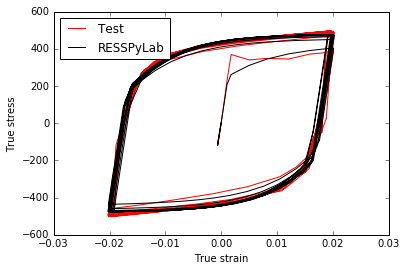

In [6]:
plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')

# 4 - Example with multiple tests

In [7]:

testFileNames=['example_1.csv','example_2.csv']


listCleanTests=[]

for testFileName in testFileNames:
    
    test=pd.read_csv(testFileName)
    
    listCleanTests.append(test)



In [8]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt_SVD(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 17569.3186319 ; norm_grad: 3589.95473454
It. 1 ; Function: 16713.8611242 ; norm_grad: 2832.55095292
It. 2 ; Function: 15167.5154984 ; norm_grad: 1667.35258496
It. 3 ; Function: 12676.3032853 ; norm_grad: 704.189121607
It. 4 ; Function: 10875.0860572 ; norm_grad: 299.326157482
It. 5 ; Function: 10514.4969181 ; norm_grad: 128.406076676
It. 6 ; Function: 10363.3283342 ; norm_grad: 60.5474486043
It. 7 ; Function: 10315.7425174 ; norm_grad: 29.4842766064
It. 8 ; Function: 10143.3836311 ; norm_grad: 24.6871888049
It. 9 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 10 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 11 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 12 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 13 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 14 ; Function: 10099.1211238 ; norm_grad: 24.6871888049
It. 15 ; Function: 10099.1211238 ; norm_grad: 28.704667106
It. 16 ; Function: 9706.68586189 ; norm_grad: 28.70

In [9]:
x_0=[200e3,355,1e-1,1e-1,1e-1,1e-1]

sol=RESSPyLab.VCopt_J(x_0,listCleanTests)

print(sol)

It. 0 ; Function: 17569.3186319 ; norm_grad: 3639.56945626
It. 1 ; Function: 16591.0861116 ; norm_grad: 2965.51259722
It. 2 ; Function: 14849.7888068 ; norm_grad: 1877.88993285
It. 3 ; Function: 12147.09608 ; norm_grad: 792.875143137
It. 4 ; Function: 10750.9837988 ; norm_grad: 336.553056201
It. 5 ; Function: 10473.5527151 ; norm_grad: 144.08614423
It. 6 ; Function: 10363.2530233 ; norm_grad: 66.8776223865
It. 7 ; Function: 10321.9902788 ; norm_grad: 31.8026162694
It. 8 ; Function: 10145.356867 ; norm_grad: 23.6001557075
It. 9 ; Function: 10107.2597582 ; norm_grad: 23.6001557075
It. 10 ; Function: 10107.2597582 ; norm_grad: 23.6001557075
It. 11 ; Function: 10107.2597582 ; norm_grad: 23.6001557075
It. 12 ; Function: 10107.2597582 ; norm_grad: 23.6001557075
It. 13 ; Function: 10107.2597582 ; norm_grad: 23.6001557075
It. 14 ; Function: 10107.2597582 ; norm_grad: 100.979568462
It. 15 ; Function: 9961.03950133 ; norm_grad: 100.979568462
It. 16 ; Function: 9961.03950133 ; norm_grad: 74.01871

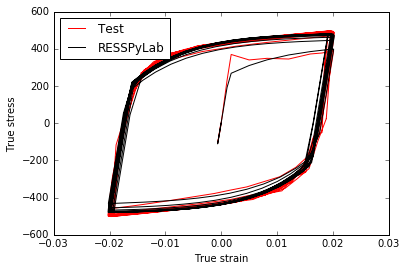

In [10]:
test=pd.read_csv('example_1.csv')

simCurve=RESSPyLab.VCsimCurve(sol,test)

plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')

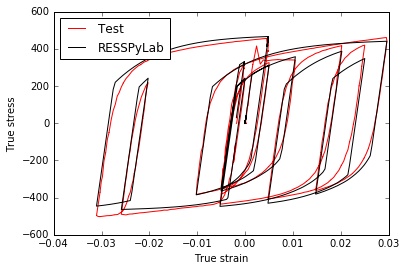

In [11]:
test=pd.read_csv('example_2.csv')

simCurve=RESSPyLab.VCsimCurve(sol,test)

plt.plot(test['e_true'],test['Sigma_true'],c='r',label='Test')
plt.plot(simCurve['e_true'],simCurve['Sigma_true'],c='k',label='RESSPyLab')
plt.legend(loc='best')
plt.xlabel('True strain')
plt.ylabel('True stress')